<a href="https://colab.research.google.com/github/harshita22chourasiya/OIBSIP/blob/main/Email_spam_Detection_with_Machine_Learning_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email spam Detection with Machine Learning**

**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

**Load and Explore the Dataset**

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')

data.head()

data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

data.columns = ['label', 'text']

# Map labels to binary values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

data.isnull().sum()


,0
label,0
text,0


**Preprocess the Text Data**

In [4]:
nltk.download('stopwords')

ps = PorterStemmer()
corpus = []

for text in data['text']:
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    text = [ps.stem(word) for word in text.split() if word not in stopwords.words('english')]
    corpus.append(' '.join(text))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Convert Text to Feature Vectors**

In [5]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()
y = data['label']


**Split the data into training and testing sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Naive Bayes model**

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

**Test the model's performance**

In [8]:
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.90      0.94      0.92       150

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



**Save the trained model and vectorizer**

In [9]:
import joblib

joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(cv, 'count_vectorizer.pkl')


['count_vectorizer.pkl']

**Download the saved files**

In [ ]:
from google.colab import files

files.download('spam_detector_model.pkl')
files.download('count_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Test with New Emails**

In [ ]:
def predict_email(text):
    # Preprocess the input text
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    text = [ps.stem(word) for word in text.split() if word not in stopwords.words('english')]
    text = ' '.join(text)

    # Convert text to vector
    vector = cv.transform([text]).toarray()

    # Predict
    prediction = model.predict(vector)
    return "Spam" if prediction == 1 else "Ham"

# Test with a sample input
sample_email = "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now."
print(predict_email(sample_email))


Spam


**Some data visualizations to better understand the dataset**

<ipython-input-13-743c4a1ea045>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['label'], palette='coolwarm')


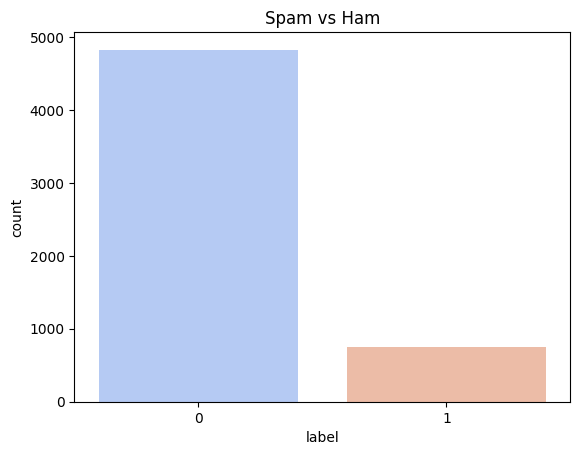

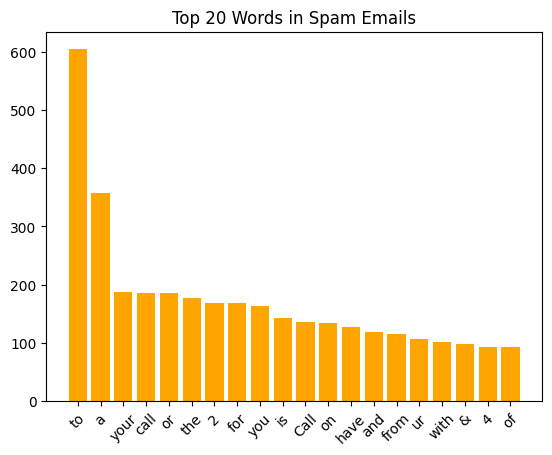

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the labels
sns.countplot(x=data['label'], palette='coolwarm')
plt.title('Spam vs Ham')
plt.show()

# Display the top 20 most common words in spam emails
from collections import Counter
spam_words = ' '.join([text for text in data[data['label'] == 1]['text']])
spam_word_counts = Counter(spam_words.split())
spam_word_counts = spam_word_counts.most_common(20)

words, counts = zip(*spam_word_counts)
plt.bar(words, counts, color='orange')
plt.xticks(rotation=45)
plt.title('Top 20 Words in Spam Emails')
plt.show()
